# EXPLORATORY DATA ANALYSIS - TERRORISM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Data Loading

In [7]:
file_path="C:\\Users\\rajas\\OneDrive\\Desktop\\globalterrorism.csv"
dataset=pd.read_csv(file_path,encoding='ISO-8859-1',low_memory=False)
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
# number of rows and columns in the datatset.
dataset.shape

(181691, 135)

### Renaming the columns

In [10]:
dataset.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region',
                        'attacktype1_txt':'attacktype','targtype1_txt':'targettype'},inplace=True)

In [13]:
dataset.head()

,eventid,year,month,day,approxdate,extended,resolution,country,country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
#All columns
dataset.columns

Index(['eventid', 'year', 'month', 'day', 'approxdate', 'extended',
       'resolution', 'country', 'country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [12]:
#data types of columns
dataset.dtypes

eventid        int64
year           int64
month          int64
day            int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

### Data Cleaning

In [19]:
#Take only required columns from the original dataset
dataset=dataset[['year','month','day','country','region','city','attacktype','targettype','gname','nkill','nwound',
       'target1','summary','motive']]
dataset.head()

,year,month,day,country,country,region,region,city,attacktype,targettype,gname,nkill,nwound,target1,summary,motive
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0,0.0,Julio Guzman,NaN,NaN
1,1970,0,0,130,Mexico,1,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0,0.0,"Nadine Chaval, daughter",NaN,NaN
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0,0.0,Employee,NaN,NaN
3,1970,1,0,78,Greece,8,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,NaN,U.S. Embassy,NaN,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,NaN,U.S. Consulate,NaN,NaN


In [21]:
#All the columns.
for n in dataset.columns:
    print(n)

year
month
day
country
country
region
region
city
attacktype
targettype
gname
nkill
nwound
target1
summary
motive


In [22]:
#Checking the null values
dataset.isnull().sum()

year               0
month              0
day                0
country            0
country            0
region             0
region             0
city             434
attacktype         0
targettype         0
gname              0
nkill          10313
nwound         16311
target1          636
summary        66129
motive        131130
dtype: int64

In [23]:
#Drop the rows which have null values
dataset=dataset.dropna()

In [24]:
#head of dataset
dataset.head()

,year,month,day,country,country,region,region,city,attacktype,targettype,gname,nkill,nwound,target1,summary,motive
5,1970,1,1,217,United States,1,North America,Cairo,Armed Assault,Police,Black Nationalists,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,To protest the Cairo Illinois Police Deparment
8,1970,1,2,217,United States,1,North America,Madison,Facility/Infrastructure Attack,Military,New Year's Gang,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",To protest the War in Vietnam and the draft
9,1970,1,3,217,United States,1,North America,Madison,Facility/Infrastructure Attack,Government (General),New Year's Gang,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",To protest the War in Vietnam and the draft
11,1970,1,6,217,United States,1,North America,Denver,Facility/Infrastructure Attack,Military,Left-Wing Militants,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Protest the draft and Vietnam War
14,1970,1,9,217,United States,1,North America,Rio Piedras,Facility/Infrastructure Attack,Business,Armed Commandos of Liberation,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,To protest United States owned businesses in P...


In [26]:
#After removing null values
dataset.isnull().sum()

year          0
month         0
day           0
country       0
country       0
region        0
region        0
city          0
attacktype    0
targettype    0
gname         0
nkill         0
nwound        0
target1       0
summary       0
motive        0
dtype: int64

In [30]:
#Getting summary of data
dataset.describe()

,year,month,day,country,region,nkill,nwound
count,46975.000000,46975.000000,46975.000000,46975.000000,46975.000000,46975.000000,46975.000000
mean,2007.913358,6.493049,15.238616,126.322746,7.475913,2.425354,4.982544
std,6.482828,3.379495,8.824971,100.562809,2.568724,13.174723,59.462728
min,1970.000000,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000
25%,2005.000000,4.000000,8.000000,92.000000,6.000000,0.000000,0.000000
50%,2009.000000,7.000000,15.000000,95.000000,6.000000,0.000000,0.000000
75%,2011.000000,9.000000,23.000000,160.000000,10.000000,2.000000,3.000000
max,2017.000000,12.000000,31.000000,1004.000000,12.000000,1384.000000,8191.000000


In [31]:
# sorting the dataset in descending order on basis of killed column.
dataset.sort_values(by=['nkill'],ascending=False).head(6)

,year,month,day,country,country,region,region,city,attacktype,targettype,gname,nkill,nwound,target1,summary,motive
73126,2001,9,11,217,United States,1,North America,New York City,Hijacking,Private Citizens & Property,Al-Qaida,1384.0,8190.0,Passengers and crew members on American Airlin...,09/11/2001: This was one of four related attac...,Unknown
73127,2001,9,11,217,United States,1,North America,New York City,Hijacking,Private Citizens & Property,Al-Qaida,1383.0,8191.0,Passengers and crew members on United Airlines...,09/11/2001: This was one of four related attac...,Unknown
133225,2014,6,10,95,Iraq,10,Middle East & North Africa,Badush,Armed Assault,Police,Islamic State of Iraq and the Levant (ISIL),670.0,0.0,Badush Prison,06/10/2014: Assailants stormed Badush prison i...,"The specific motive is unknown; however, sourc..."
179671,2017,10,14,182,Somalia,11,Sub-Saharan Africa,Mogadishu,Bombing/Explosion,Business,Al-Shabaab,588.0,316.0,Hotel,10/14/2017: A suicide bomber detonated an expl...,"The specific motive is unknown; however, sourc..."
76347,2004,3,21,141,Nepal,6,South Asia,Dhading district,Armed Assault,Government (General),Communist Party of Nepal- Maoist (CPN-M),518.0,216.0,"Government infrastructure in the town of Bedi,...",03/21/2004: Nepalese Communist Party (Maoist) ...,Unknown
76953,2004,9,1,167,Russia,9,Eastern Europe,Beslan,Hostage Taking (Barricade Incident),Educational Institution,Riyadus-Salikhin Reconnaissance and Sabotage B...,344.0,727.0,"School Number One (SNO) in Beslan, Russia",09/01/2004: A group of thirty to thirty-five a...,Unknown


In [32]:
# changing datatype of killed column from float to int.
dataset=dataset.astype({'nkill':'int'})

In [33]:
dataset.dtypes

year            int64
month           int64
day             int64
country         int64
country        object
region          int64
region         object
city           object
attacktype     object
targettype     object
gname          object
nkill           int32
nwound        float64
target1        object
summary        object
motive         object
dtype: object

In [36]:
# number of rows and columns in the dataset after data cleaning.
dataset.shape

(46975, 16)

## Number of terrorist attacks each year

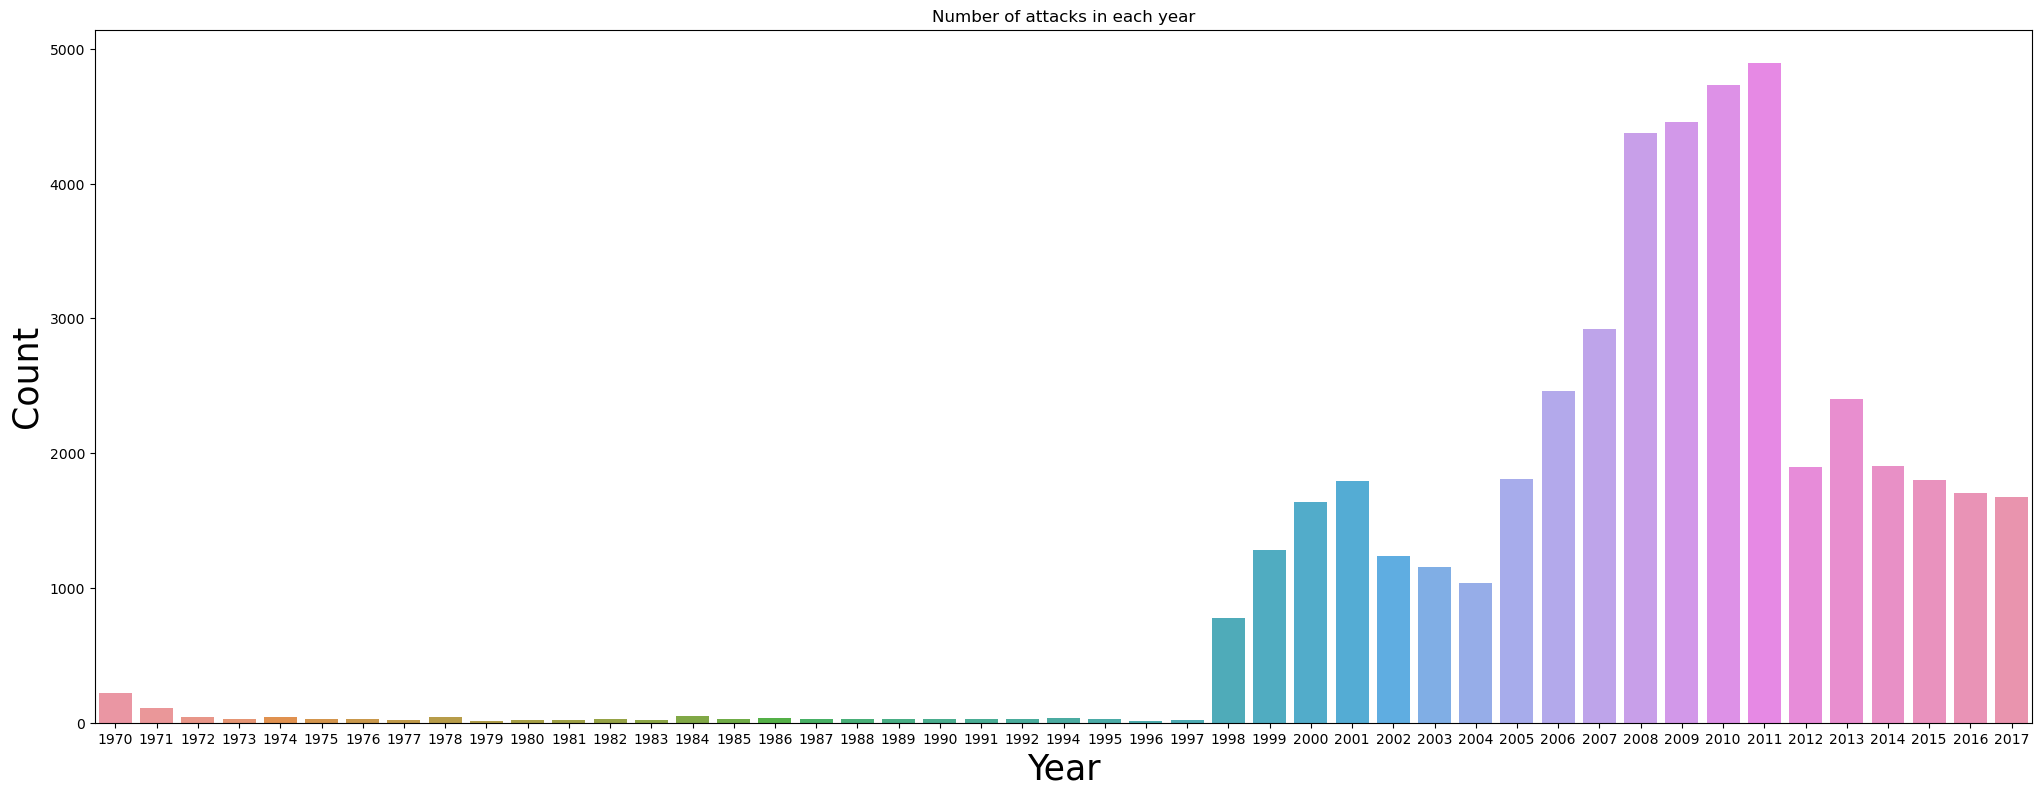

In [47]:
plt.subplots(figsize=(25,9))
sns.countplot(x='year', data=dataset)
plt.title('Number of attacks in each year')
plt.xlabel("Year",fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.show()

#### By this we can say that the year 2011 has more number of terrorist attacks between the years 1970-2017

### Terrorist Activities by Region in each Year

In [51]:
#Extract year and region
dataset.year

5         1970
8         1970
9         1970
11        1970
14        1970
          ... 
181663    2017
181665    2017
181672    2017
181682    2017
181683    2017
Name: year, Length: 46975, dtype: int64

In [52]:
dataset.region

,region,region
5,1,North America
8,1,North America
9,1,North America
11,1,North America
14,1,North America
...,...,...
181663,6,South Asia
181665,6,South Asia
181672,6,South Asia
181682,8,Western Europe


## Total number of attacks of each country

In [58]:
dataset.head()

,year,month,day,country,country,region,region,city,attacktype,targettype,gname,nkill,nwound,target1,summary,motive
5,1970,1,1,217,United States,1,North America,Cairo,Armed Assault,Police,Black Nationalists,0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,To protest the Cairo Illinois Police Deparment
8,1970,1,2,217,United States,1,North America,Madison,Facility/Infrastructure Attack,Military,New Year's Gang,0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",To protest the War in Vietnam and the draft
9,1970,1,3,217,United States,1,North America,Madison,Facility/Infrastructure Attack,Government (General),New Year's Gang,0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",To protest the War in Vietnam and the draft
11,1970,1,6,217,United States,1,North America,Denver,Facility/Infrastructure Attack,Military,Left-Wing Militants,0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Protest the draft and Vietnam War
14,1970,1,9,217,United States,1,North America,Rio Piedras,Facility/Infrastructure Attack,Business,Armed Commandos of Liberation,0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,To protest United States owned businesses in P...


In [74]:
top_15 = dataset.iloc[:,4].value_counts()[:15].to_frame().reset_index()
top_15.columns = ['Country', 'Count']
top_15

,Country,Count
0,Iraq,8869
1,India,5432
2,Pakistan,4909
3,Afghanistan,3222
4,Philippines,2262
5,Thailand,1804
6,Russia,1490
7,United States,1427
8,Colombia,1417
9,Algeria,1371


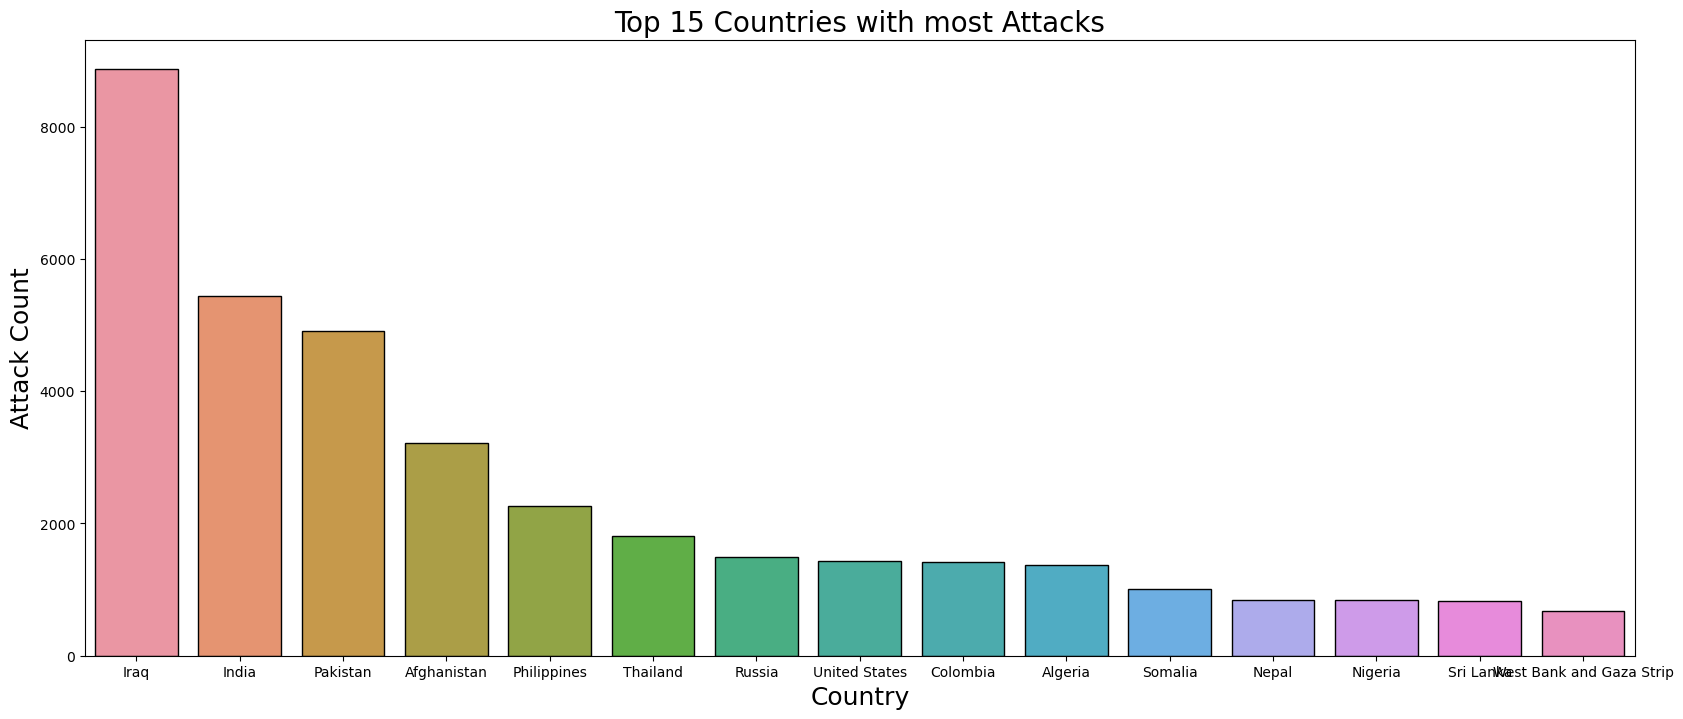

In [84]:
plt.figure(figsize=(20,8))
sns.barplot(data=top_15,x='Country',y='Count',ec='black',lw=1)
plt.title('Top 15 Countries with most Attacks',fontsize=20)
plt.xlabel('Country',fontsize=18)
plt.ylabel('Attack Count',fontsize=18)
plt.show()

#### We can say that iraq has more number of attacks compared to other countries

In [91]:
#Number of kills per each region
regiontype = dataset.iloc[:,6].value_counts()[:].to_frame().reset_index()
regiontype.columns = ['Region', 'Count']
regiontype

,Region,Count
0,South Asia,15928
1,Middle East & North Africa,14350
2,Southeast Asia,4746
3,Sub-Saharan Africa,3663
4,Western Europe,2450
5,Eastern Europe,2104
6,South America,1684
7,North America,1547
8,Central Asia,229
9,East Asia,152


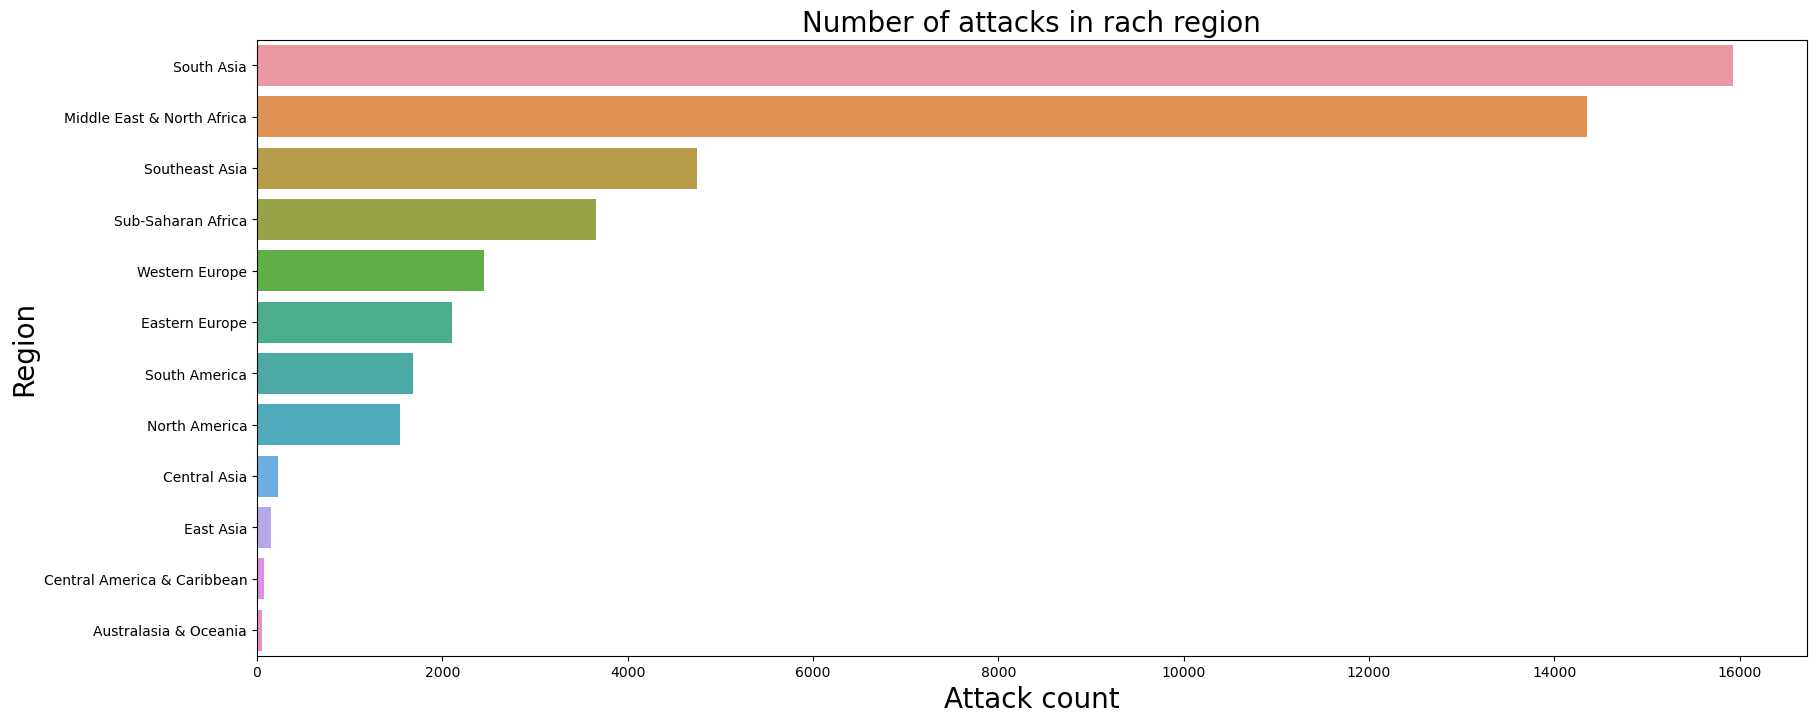

In [95]:
plt.figure(figsize=(20,8))
sns.barplot(data=regiontype,x='Count',y='Region')
plt.title('Number of attacks in rach region',fontsize=20)
plt.xlabel('Attack count',fontsize=20)
plt.ylabel('Region',fontsize=20)
plt.show()

#### Here we can say that South Asia region has more number of attacks where as Australasia and ocenia has less number of attacks

### Highest  number of attacks with respect to groups

In [105]:
top15_groups=dataset.gname.value_counts()[1:15]
top15_groups

Taliban                                           1885
Communist Party of India - Maoist (CPI-Maoist)    1655
Revolutionary Armed Forces of Colombia (FARC)      856
New People's Army (NPA)                            810
Tehrik-i-Taliban Pakistan (TTP)                    798
Islamic State of Iraq and the Levant (ISIL)        788
Maoists                                            743
Al-Shabaab                                         648
Liberation Tigers of Tamil Eelam (LTTE)            618
Al-Qaida in Iraq                                   551
Boko Haram                                         381
Algerian Islamic Extremists                        343
Kurdistan Workers' Party (PKK)                     286
Chechen Rebels                                     283
Name: gname, dtype: int64

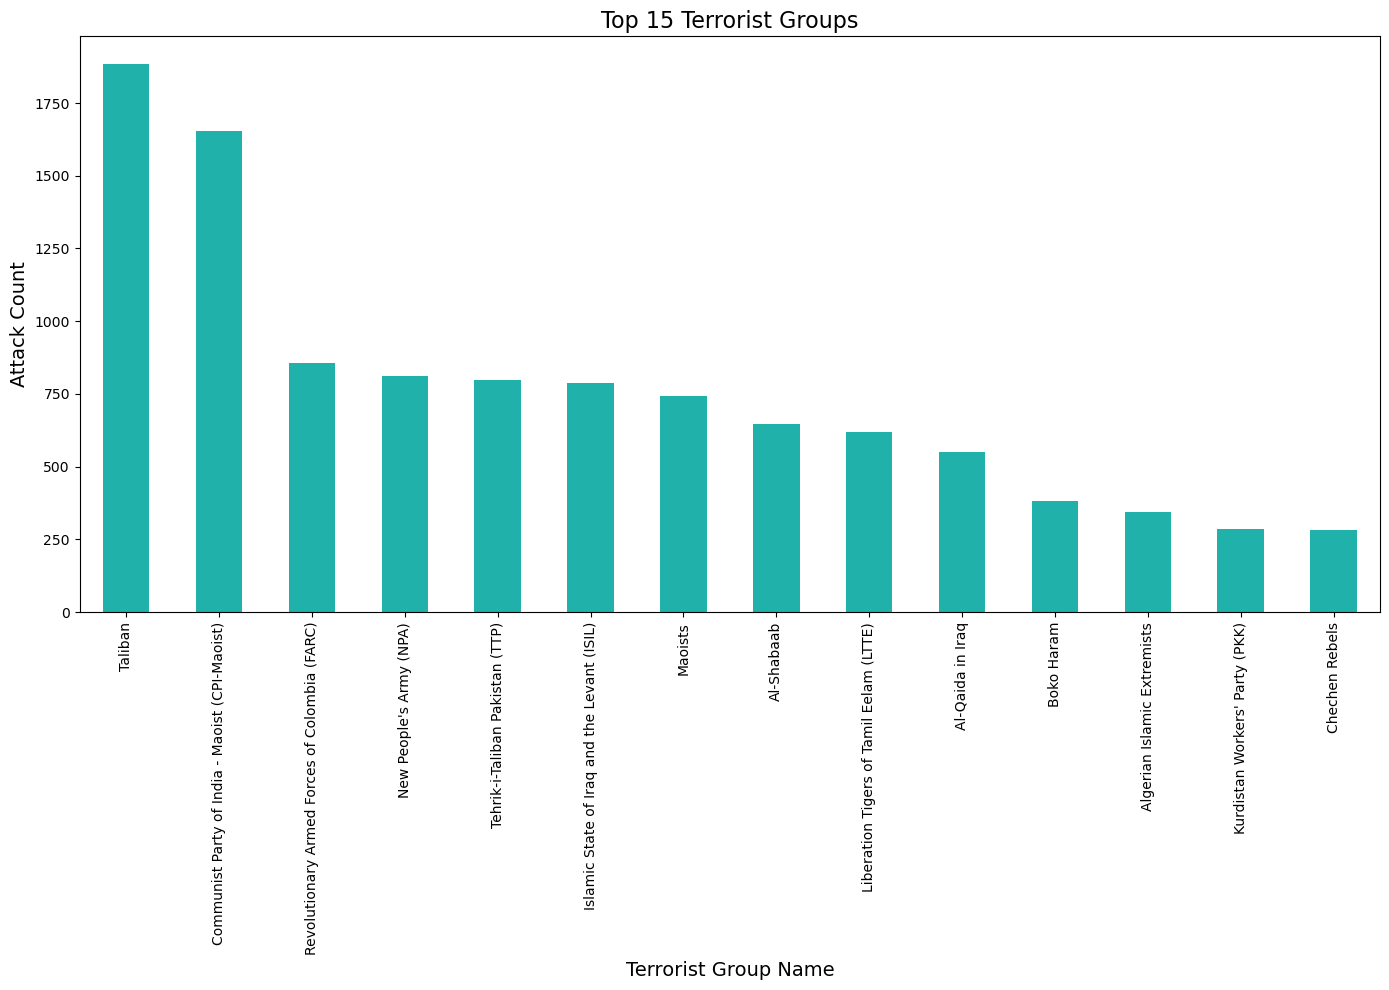

In [115]:
plt.figure(figsize=(14,10))
top15_groups.plot(kind='bar', color='lightseagreen')
plt.title('Top 15 Terrorist Groups', fontsize=16)
plt.xlabel('Terrorist Group Name', fontsize=14)
plt.ylabel('Attack Count', fontsize=14)
plt.tight_layout()
plt.show()

#### We can say taliban group made more number of attacks

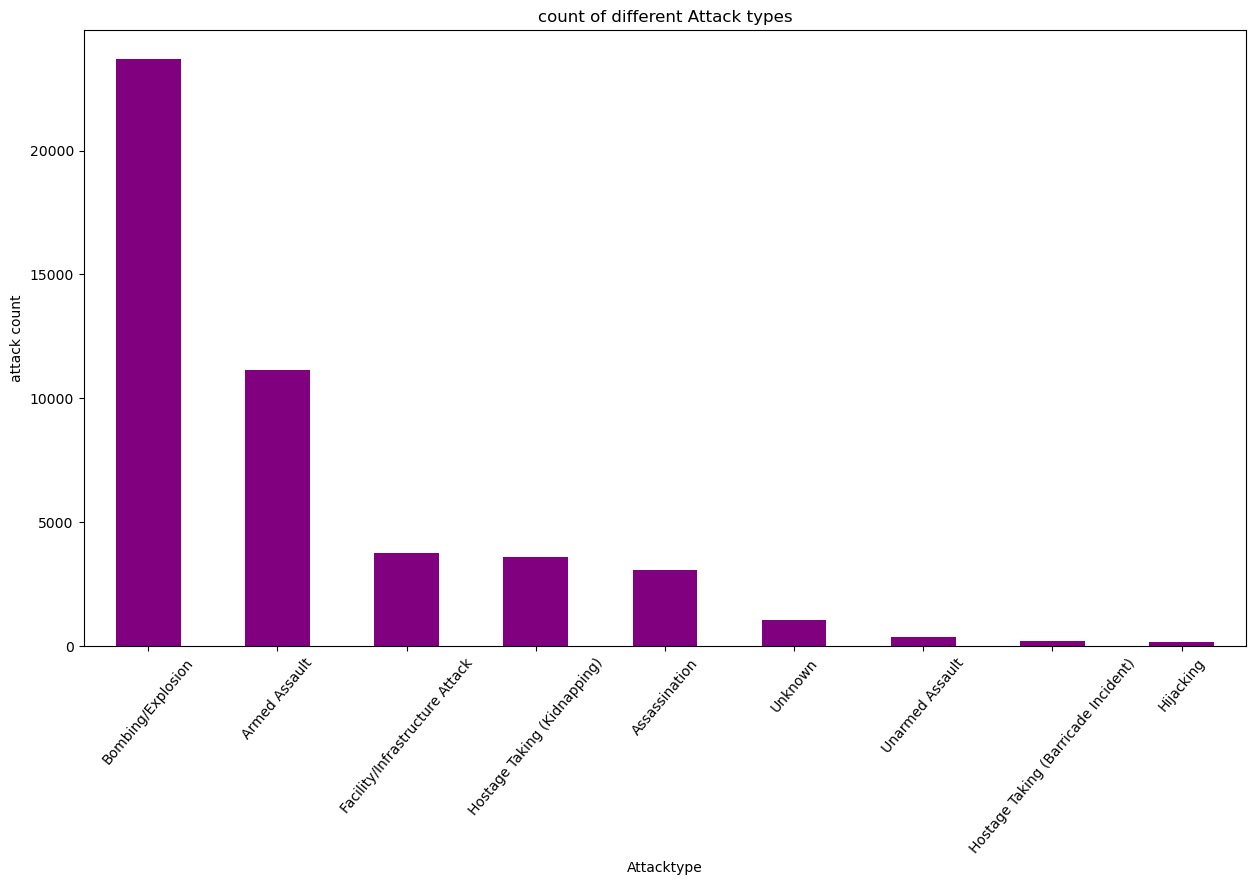

In [120]:
dataset['attacktype'].value_counts().plot(kind='bar',figsize=(15,8),color='purple')
plt.title('count of different Attack types')
plt.xlabel('Attacktype')
plt.xticks(rotation=50)
plt.ylabel("attack count")
plt.show()

#### We can say Bombing/Explosion type of attacks are more and hijacking and hostage taking attacks are less

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Armed Assault'),
  Text(1, 0, 'Assassination'),
  Text(2, 0, 'Bombing/Explosion'),
  Text(3, 0, 'Facility/Infrastructure Attack'),
  Text(4, 0, 'Hijacking'),
  Text(5, 0, 'Hostage Taking (Barricade Incident)'),
  Text(6, 0, 'Hostage Taking (Kidnapping)'),
  Text(7, 0, 'Unarmed Assault'),
  Text(8, 0, 'Unknown')])

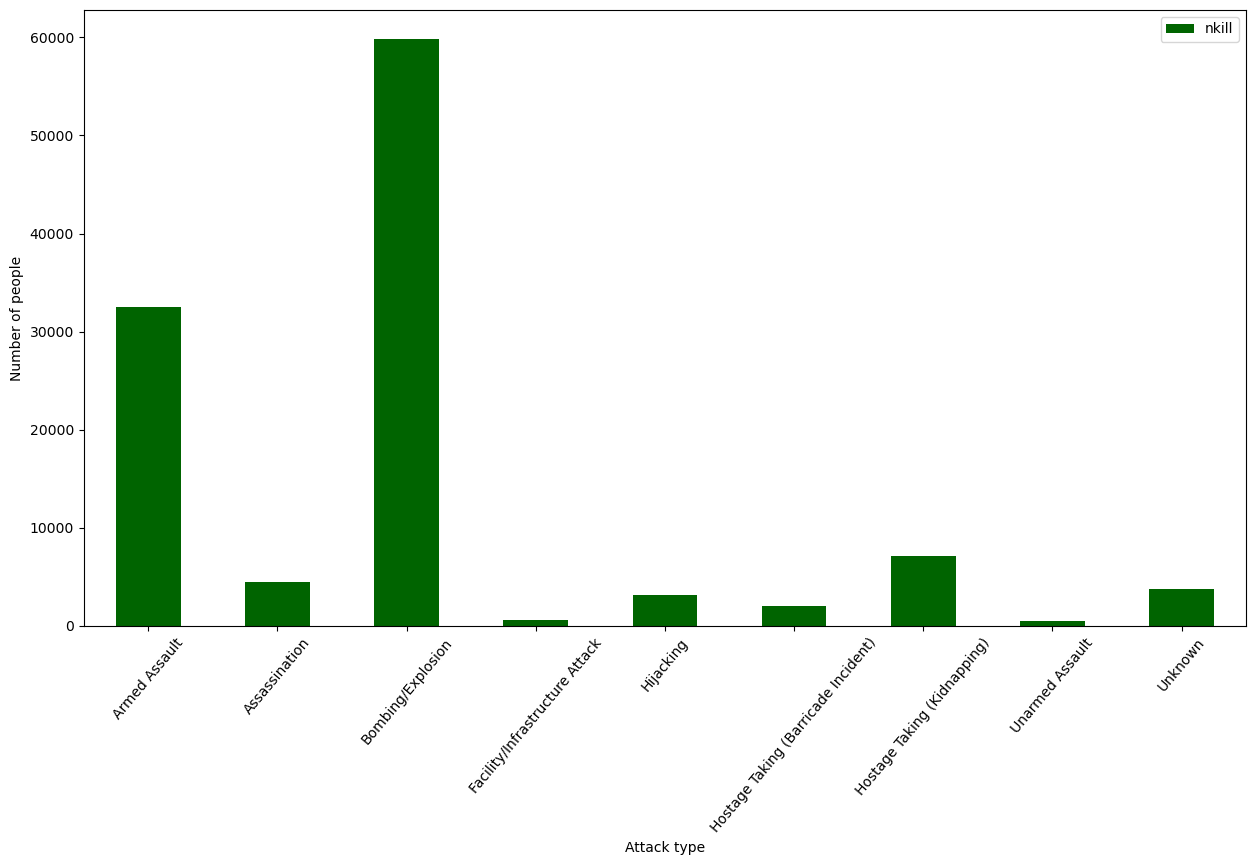

In [119]:
dataset[['attacktype','nkill']].groupby(['attacktype'],axis=0).sum().plot(kind='bar',figsize=(15,8),color=['darkgreen'])
plt.xlabel('Attack type')
plt.ylabel('Number of people')
plt.xticks(rotation=50)

#### According to this most number of people are killed due to Explosion and armed assault is next to that

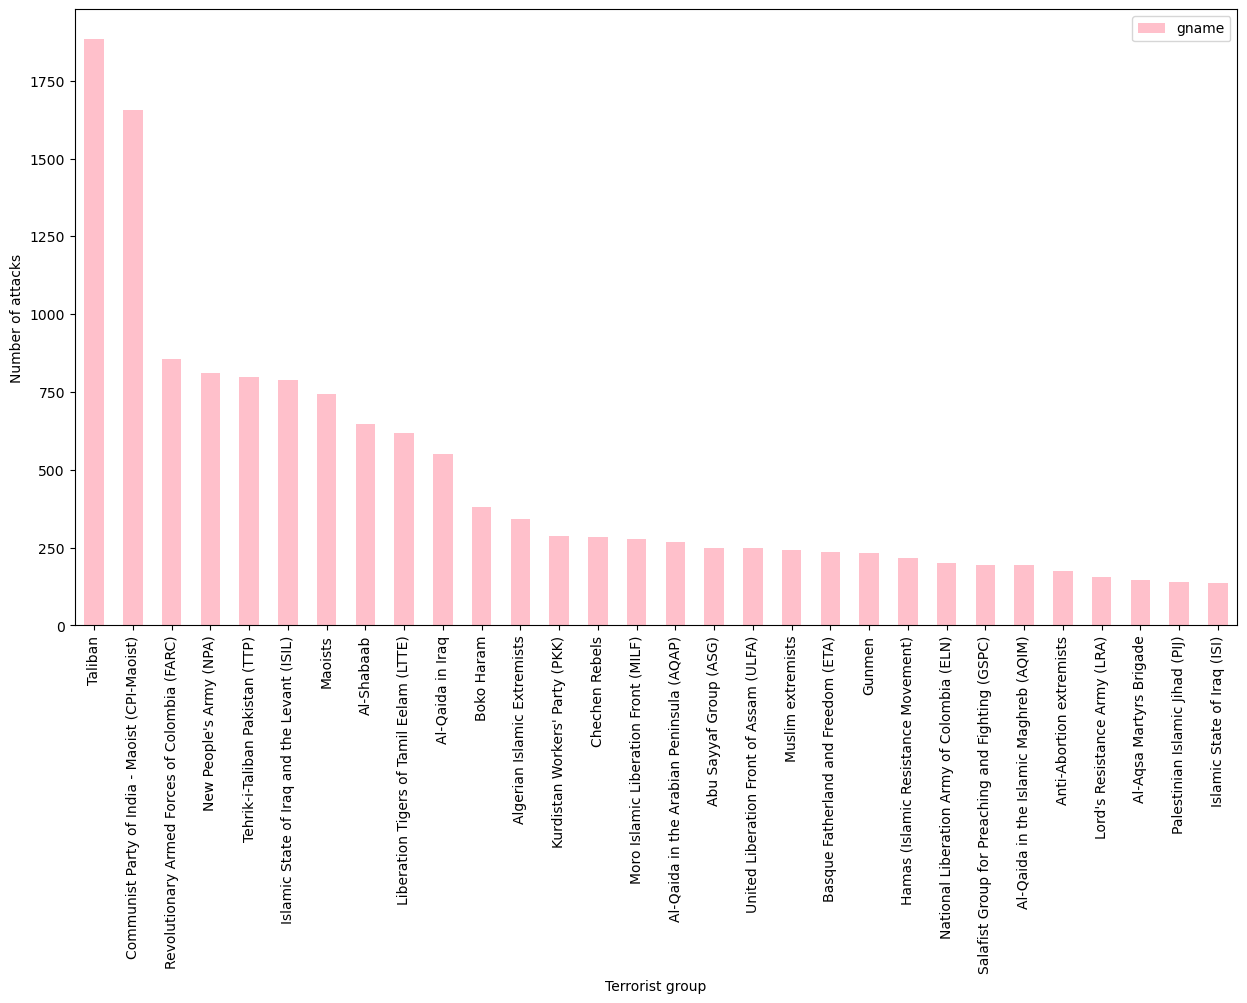

In [133]:
dataset['gname'].value_counts().to_frame().drop('Unknown').head(30).plot(kind='bar',color='pink',figsize=(15,8))
plt.xlabel("Terrorist group")
plt.ylabel("Number of attacks")
plt.show()

#### Most number of attacks are by Talibans followed by CPI-Maoist and Revolutionary Armes forces of columbia

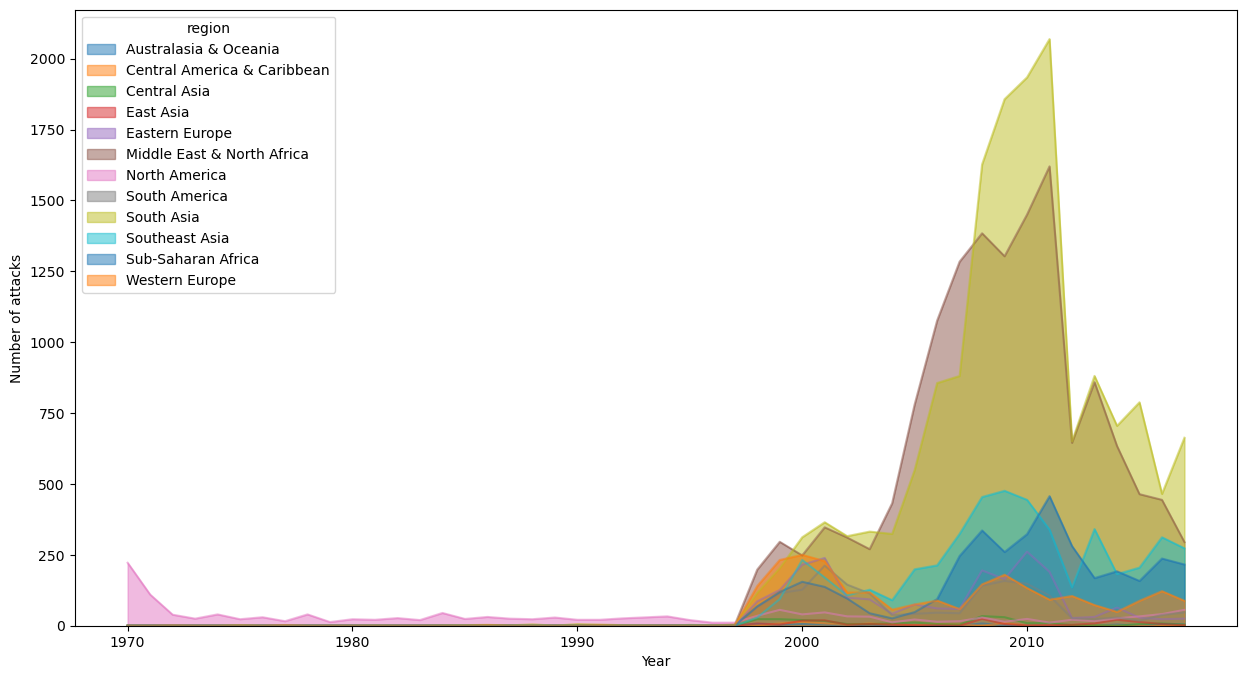

In [135]:
pd.crosstab(dataset.year,dataset.iloc[:,6]).plot(kind='area',stacked=False,figsize=(15,8))
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.show()

#### Above figure shows the yearwise number of attacks w.r.t each region
#### The most number of attacks occured in south Asia around the year 2010

### Death and Injuries

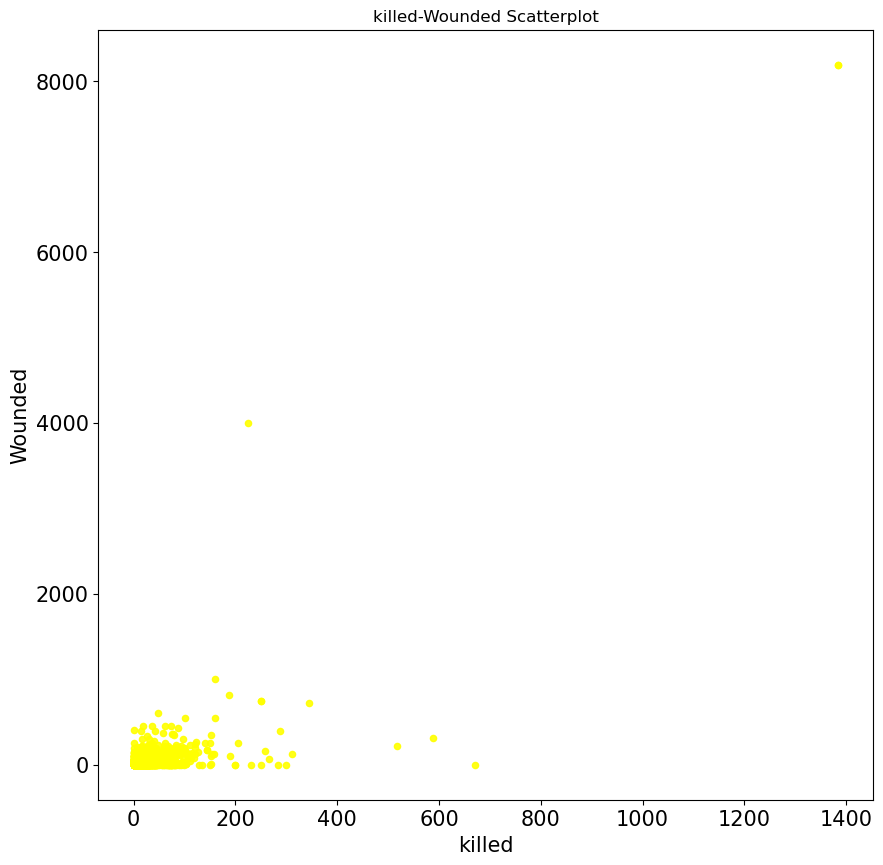

In [139]:
dataset.plot(kind='scatter',x='nkill',y='nwound',alpha=0.9,color='yellow',figsize=(10,10),fontsize=15)
plt.title('killed-Wounded Scatterplot')
plt.xlabel('killed',fontsize=15)
plt.ylabel('Wounded',fontsize=15)
plt.show()

## Weapons used

In [141]:
file_path="C:\\Users\\rajas\\OneDrive\\Desktop\\globalterrorism.csv"
dataset2=pd.read_csv(file_path,encoding='ISO-8859-1',low_memory=False)
dataset2.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


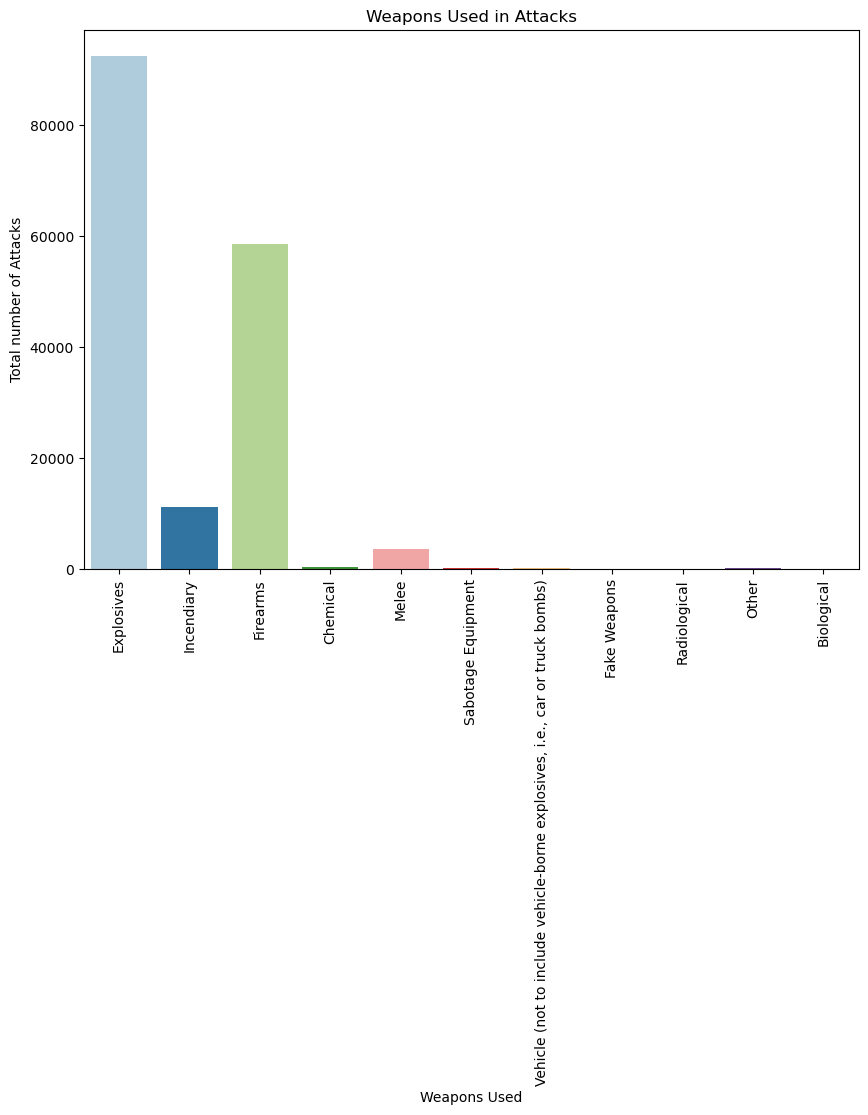

In [143]:
dataset2 = dataset2[dataset2['weaptype1_txt'] != 'Unknown']
plt.figure(figsize=(10, 7))
sns.countplot(data=dataset2, x='weaptype1_txt', palette='Paired')
plt.xticks(rotation=90)
plt.ylabel("Total number of Attacks")
plt.xlabel("Weapons Used")
plt.title("Weapons Used in Attacks")
plt.show()


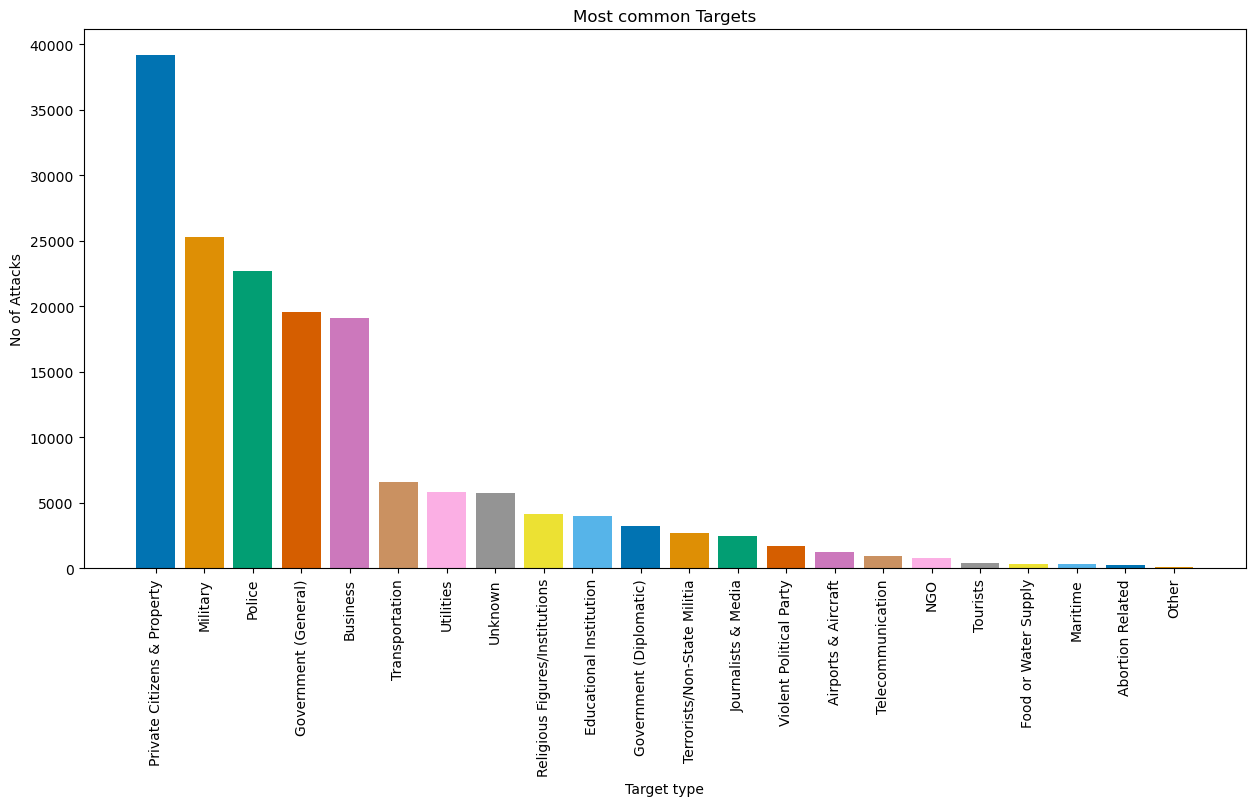

In [147]:
plt.figure(figsize = (15,7))
plt.bar(x = dataset2['targtype1_txt'].value_counts().index[:25], height = dataset2['targtype1_txt'].value_counts()[:25], color = sns.color_palette('colorblind'))
plt.title("Most common Targets")
plt.xlabel("Target type")
plt.xticks(rotation = 90)
plt.ylabel("No of Attacks")
plt.show()

#### We can see that most common target are Private citizens and Property follwed by Millitary